In [96]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

%matplotlib inline

# Boston Marathon Data, 2014

# Load and clean data

In [12]:
raw_df = pd.read_csv('boston_2014.csv')

In [23]:
raw_df.sort_values('overall')

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
39,30.48,"Keflezighi, Meb",1,76.00,M,38,128.62,19,1,NaN,...,1,4.92,CA,91.17,15.15,64.35,61.08,USA,San Diego,121.82
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
11,30.52,"Chebet, Wilson",2,76.97,M,28,128.80,7,2,NaN,...,2,4.92,NaN,92.52,15.18,64.87,61.63,KEN,Marakwet,121.95
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
20,30.50,"Chepkwony, Frankline",3,76.95,M,29,128.83,11,3,NaN,...,3,4.92,NaN,92.52,15.18,64.90,61.63,KEN,Koibatek,122.22
50,30.82,"Shafar, Vitaliy",4,76.85,M,32,129.62,23,4,NaN,...,4,4.95,NaN,92.50,15.40,64.93,61.62,UKR,Lutsk,122.97
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
16,17.13,"Madera, Jordi",5,47.45,M,34,84.70,W9,5,NaN,...,5,3.23,NaN,58.73,8.02,39.12,36.98,ESP,Les Franquesas,79.92
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,...,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80


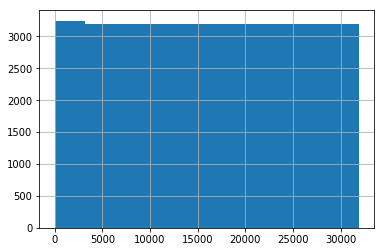

In [190]:
raw_df.overall.hist()

In [13]:
raw_df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [21]:
raw_df.bib.describe()

count     31984
unique    31984
top         456
freq          1
Name: bib, dtype: object

In [59]:
df = raw_df[['name', 'division','gender', 'age', 'official',
       'genderdiv', 'overall', 'pace',
       'country',]].sort_values('overall')
df = df[df.pace > 4.9] # remove the top wheelchair racers
df

,name,division,gender,age,official,genderdiv,overall,pace,country
39,"Keflezighi, Meb",1,M,38,128.62,1,1,4.92,USA
11,"Chebet, Wilson",2,M,28,128.80,2,2,4.92,KEN
20,"Chepkwony, Frankline",3,M,29,128.83,3,3,4.92,KEN
50,"Shafar, Vitaliy",4,M,32,129.62,4,4,4.95,UKR
7,"Geneti, Markos",5,M,29,129.83,5,5,4.97,ETH
32,"Kimurer, Joel",6,M,26,131.05,6,6,5.00,KEN
47,"Arciniaga, Nicholas",7,M,30,131.78,7,7,5.03,USA
54,"Eggleston, Jeffrey",8,M,29,131.95,8,8,5.03,USA
29,"Lonyangata, Paul",9,M,31,132.57,9,9,5.07,KEN
26,"Annani, Adil",10,M,33,132.72,10,10,5.07,MAR


### Convert country and gender fields

In [60]:
country_agg = df.groupby('country', as_index=False).agg('count').sort_values('name') #.plot(kind="bar", title="Average time by age group")

In [62]:
lots_of_runners = country_agg[country_agg['name'] >= 200].country
df = df[df.country.isin(lots_of_runners)]

In [72]:
country_dummies_df = pd.get_dummies(df.country)
df = pd.concat([df, country_dummies_df], axis=1)

In [84]:
sex_dummies_df = pd.get_dummies(df.gender)
df = pd.concat([df, sex_dummies_df], axis=1).drop(columns=['gender'])

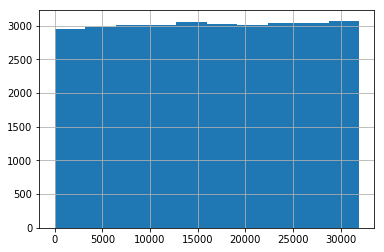

In [191]:
df.overall.hist()

# MODELING HELPER FUNCTIONS

## Kmeans

In [173]:
def run_mini(n_clusters=3):
    print('\n\nK MEANS____________')
    from sklearn.cluster import MiniBatchKMeans
    # Each batch will be made up of 200 data points.
    minibatchkmeans = MiniBatchKMeans(
        init='random',
        n_clusters=n_clusters,
        batch_size=200)
    minibatchkmeans.fit(X_train)

    # Add the new predicted cluster memberships to the data frame.
    predict_mini = minibatchkmeans.predict(X_train)

#     misses = (predict_mini != y)
    #Plot the solution.
    labels = minibatchkmeans.labels_
    plt.scatter(X_train.overall, X_train.age, c=labels, s=3)
    plt.xlabel('overall place')
    plt.ylabel('age')
    plt.show()


    # Check the MiniBatch model against our earlier one.
    print('Comparing k-means and mini batch k-means solutions:')
    print(pd.crosstab(predict_mini, y_train))

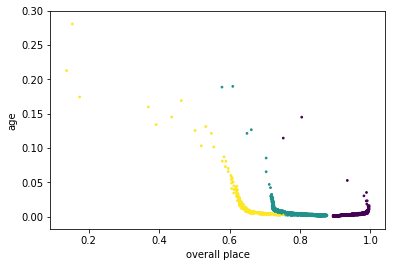

Comparing k-means and mini batch k-means solutions:
country  CAN  GBR  ITA  MEX   USA
row_0                            
0         84   17    5    8  1304
1        110   22    8    8  1130
2         23   10    1    2   282


In [170]:
run_mini(n_clusters=3)

# Mean-shift

In [174]:
def run_mean_shift():
    print('\nMEAN SHIFT_______')
    from sklearn.cluster import MeanShift, estimate_bandwidth

    # Here we set the bandwidth. This function automatically derives a bandwidth
    # number based on an inspection of the distances among points in the data.
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)

    # Extract cluster assignments for each data point.
    labels = ms.labels_

    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

    # Count our clusters.
    n_clusters_ = len(np.unique(labels))

    print("Number of estimated clusters: {}".format(n_clusters_))

    plt.scatter(X_train.overall, X_train.age, c=labels, s=3)
    plt.xlabel('overall place')
    plt.ylabel('age')
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,labels))
    
    return n_clusters_


MEAN SHIFT_______
Number of estimated clusters: 9


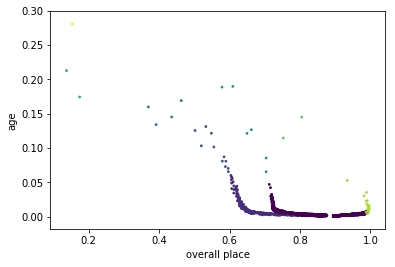

Comparing the assigned categories to the ones in the data:
col_0       0    1  2  3  4  5  6   7  8
country                                 
CAN       187   21  2  0  2  0  0   5  0
GBR        37   11  0  0  0  0  0   1  0
ITA        13    1  0  0  0  0  0   0  0
MEX        16    2  0  0  0  0  0   0  0
USA      2339  288  9  4  4  2  2  67  1


9

In [175]:
run_mean_shift()

Not bad at all.

## Spectral clustering

In [138]:
def run_spectral(n_clusters=3):
    print('\nSPECTRAL_______')
    from sklearn.cluster import SpectralClustering

    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_train)

    #Predicted clusters.
    predict=sc.fit_predict(X_train)

    #Graph results.
    plt.scatter(X_train.overall, X_train.age, c=predict, s=3)
    plt.xlabel('overall place')
    plt.ylabel('age')
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,predict))


SPECTRAL_______


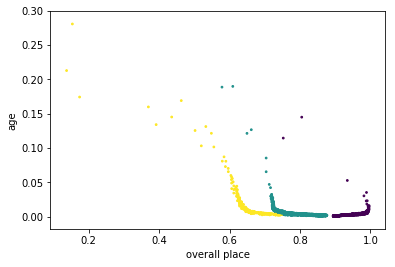

Comparing the assigned categories to the ones in the data:
col_0       0     1    2
country                 
CAN        84   111   22
GBR        17    22   10
ITA         5     8    1
MEX         8     8    2
USA      1288  1150  278


In [139]:
run_spectral()

These clusters look familiar, though the two dots at the top are interesting.

## Affinity propagation

In [142]:
def run_affinity():
    print('\n AFFINITY_____')
    from sklearn.cluster import AffinityPropagation
    from ssklearn import metrics

    # Declare the model and fit it in one statement.
    # Note that you can provide arguments to the model, but we didn't.
    af = AffinityPropagation().fit(X_train)
    print('Done')

    # Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_

    print('Estimated number of clusters: {}'.format(n_clusters_))

    from itertools import cycle

    plt.figure(1)
    plt.clf()

    # Cycle through each cluster and graph them with a center point for the
    # exemplar and lines from the exemplar to each data point in the cluster.
#     colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
#     for k, col in zip(range(n_clusters_), colors):
#         class_members = labels == k
#         cluster_center = X_train[cluster_centers_indices[k]]
#         plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
#         plt.plot(cluster_center[0],
#                  cluster_center[1],
#                  'o',
#                  markerfacecolor=col,
#                  markeredgecolor='k')
#         for x in X_train[class_members]:
#             plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

#     plt.title('Estimated number of clusters: {}'.format(n_clusters_))
#     plt.show()


In [172]:
run_affinity()


 AFFINITY_____
Done
Estimated number of clusters: 2018


<Figure size 432x288 with 0 Axes>

Affinity propagation is known to overestimate the number of clusters – in this case, we have an absolutely absurd number.  Let's see what that looks like:

# TEST ALGORITHMS

In [192]:
X = df.drop(columns=['country', 'name'])
X = pd.DataFrame(normalize(X), columns=X.columns)
y = df.country
X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9,
        random_state=42)


MEAN SHIFT_______
Number of estimated clusters: 9


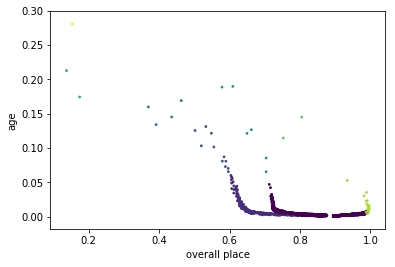

Comparing the assigned categories to the ones in the data:
col_0       0    1  2  3  4  5  6   7  8
country                                 
CAN       187   21  2  0  2  0  0   5  0
GBR        37   11  0  0  0  0  0   1  0
ITA        13    1  0  0  0  0  0   0  0
MEX        16    2  0  0  0  0  0   0  0
USA      2339  288  9  4  4  2  2  67  1


K MEANS____________


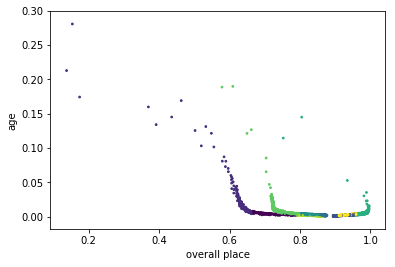

Comparing k-means and mini batch k-means solutions:
country  CAN  GBR  ITA  MEX  USA
row_0                           
0         14    6    1    2  128
1          9    6    0    0  176
2         16    5    2    3  487
3         27    7    6    2  377
4         29    5    0    1  196
5         25    7    0    1  251
6         42    6    1    3  312
7         12    2    1    2  223
8         43    5    3    4  566

SPECTRAL_______


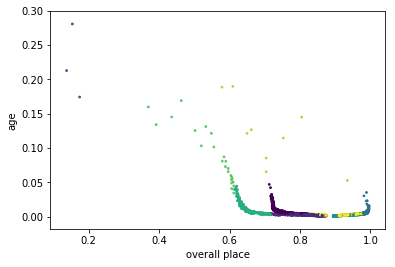

Comparing the assigned categories to the ones in the data:
col_0      0    1  2    3    4    5   6  7    8
country                                        
CAN       40   50  0    6   27   15   2  2   75
GBR        6   13  0    3    5    8   1  0   13
ITA        1    4  0    0    2    1   0  0    6
MEX        3    4  0    1    3    2   0  0    5
USA      274  705  3  123  569  223  23  7  789

 AFFINITY_____
Done
Estimated number of clusters: 2018


<Figure size 432x288 with 0 Axes>

In [176]:
n_clusters = run_mean_shift()
run_mini(n_clusters=n_clusters)
run_spectral(n_clusters=n_clusters) 
run_affinity()

## Assignment:
"Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you **teach the reader something about the Boston Marathon based on your clusters**. Write up your report, including your **process from start to finish**, in a Jupyter notebook and submit it below."

# Write-up: *Insight gained from clustering exploration*
How does age affect a marathoner's performance? Do runners, like gymnists, peak early in life?

Contrary to the idea of peaking early, marathon runners seem to "age well, reaching their best performances late in life.

Specteral clustering with 9 clusters works best to reveal this intrigueing pattern, found largely in the male runners. As we move from slower finishes to fast, we see the age move up sharply, with **the fastest runners being some of the oldest runners**. Interestingly, there's also a sudden spike around

## Major issue:
I filtered out countries with less than 200 runners. This left just close countries, like Canada and Mexico.
Who are those runners that I filtered out from countries with few representatives? **Probably a small class of elite runners willing to travel long distances to compete.** *Hence the distribution skewed toward the slower runners.*

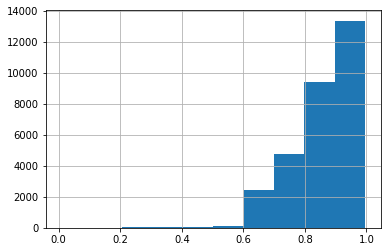

In [193]:
X.overall.hist()


SPECTRAL_______


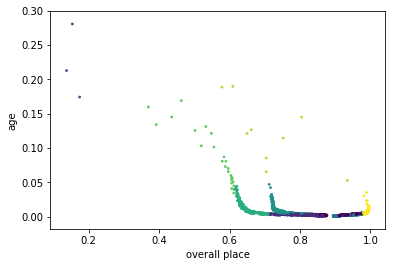

Comparing the assigned categories to the ones in the data:
col_0      0    1  2    3    4    5   6  7    8
country                                        
CAN       75   50  0   27   40   15   2  2    6
GBR       14   12  0    5    6    8   1  0    3
ITA        6    4  0    2    1    1   0  0    0
MEX        5    4  0    3    3    2   0  0    1
USA      789  703  3  569  279  220  23  7  123


In [177]:
run_spectral(9)

## For just men:

In [195]:
X = X[X.F == 0]
y = df[df.F == 0].country
X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9,
        random_state=42)

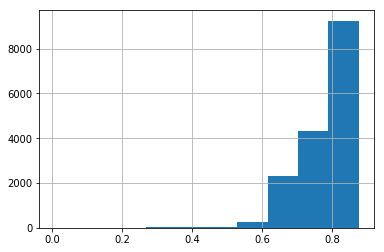

In [196]:
X.overall.hist()


SPECTRAL_______


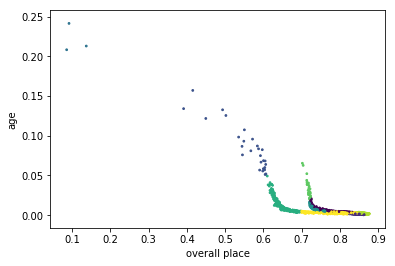

Comparing the assigned categories to the ones in the data:
col_0      0    1   2  3    4    5   6    7    8
country                                         
CAN       25    2   1  0   18   10   4   24   38
GBR        5    1   1  0    1    6   0    3    2
ITA        1    0   0  0    0    1   1    4    3
MEX        3    1   0  0    2    0   0    2    1
USA      148  169  25  3  135  218  22  404  337


In [187]:
run_spectral(9)